<a href="https://colab.research.google.com/github/bharathulaprasad/cs360ml/blob/main/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classify the MNIST image datasets using deep convolution neural networks. 
#Identify the optimal number of convolution layers and report a graph by varying the number of convolution layers (1 to 5) against accuracy. 
#Use Fully connected layer: You can use 1 to 3 numbers of the fully connected layer and examine the changes in accuracy. 
#For classification, you are allowed to use the softmax classification layer. 
#Implement the 50% dropout technique in your fully-connected layer. Give some optimal mini-batch size and learning rate.
#Save your trained model.

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils
from matplotlib import pyplot
import numpy as np
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.datasets.mnist import load_data
from numpy import mean
from numpy import std

In [ ]:
# loading the dataset
def load_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  # reshape dataset to have a single channel
  X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
  X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
	# one hot encode target values
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test
# let's print the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [ ]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# create model
model = Sequential()
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))



In [ ]:
# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 75)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 8, 8, 125)       

In [ ]:
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = train_digits[rand_14]
sample_labels = train_labels[rand_14]

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


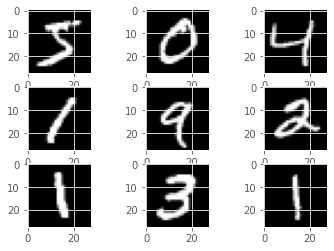

In [ ]:
# Display some images

# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()


In [ ]:

image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  

# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between (0.0,1.0]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes
# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((60000, 10), (10000, 10))

In [ ]:
# Train test split
# shuffle the training dataset (5 times!)
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now set-aside 10% of the train_data/labels as the
# cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))

# first pick validation set from train_data/labels
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]



In [ ]:

# build a sequential model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model = define_model()
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               540900    
_________________________________________________________________
batch_normalization_14 (Batc (None, 100)               400       
_________________________________________________________________
dense_20 (Dense)             (None, 10)              

In [ ]:
history = model.fit(train_data2, train_labels_cat2, 
                    epochs=10, batch_size=64,
                    validation_data=(val_data, val_labels_cat))

Epoch 1/10
844/844 [==============================] - 37s 43ms/step - loss: 0.2431 - accuracy: 0.9267 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 2/10
844/844 [==============================] - 36s 42ms/step - loss: 0.0523 - accuracy: 0.9855 - val_loss: 0.0549 - val_accuracy: 0.9832
Epoch 3/10
844/844 [==============================] - 36s 42ms/step - loss: 0.0289 - accuracy: 0.9922 - val_loss: 0.0462 - val_accuracy: 0.9847
Epoch 4/10
844/844 [==============================] - 35s 42ms/step - loss: 0.0188 - accuracy: 0.9955 - val_loss: 0.0438 - val_accuracy: 0.9865
Epoch 5/10
844/844 [==============================] - 35s 42ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 6/10
844/844 [==============================] - 36s 42ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.0447 - val_accuracy: 0.9865
Epoch 7/10
844/844 [==============================] - 36s 43ms/step - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.0482 - val_accuracy:

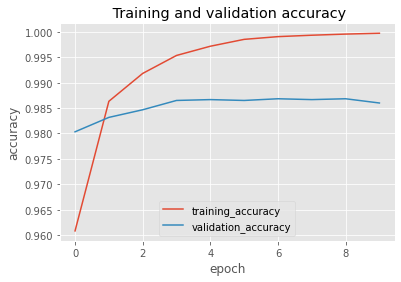

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(' Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower center')
plt.show()

[INFO] plotting training history...


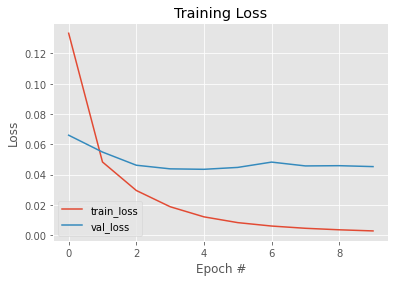

In [ ]:
print("[INFO] plotting training history...")
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig(plotPath)
plt.show()
#plt.savefig('trainingloss.jpg')

In [ ]:
test_loss, test_accuracy = \
  model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 2s 13ms/step - loss: 0.0427 - accuracy: 0.9867
Test loss: 0.0427 accuracy: 0.9867
